In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
import matplotlib as mp
from matplotlib.ticker import StrMethodFormatter
import pandas as pd 
import numpy as np
import os 
import seaborn as sns
import importlib
from brokenaxes import brokenaxes

# Experiment 1

In [2]:
exp1_data = pd.read_csv('dataframes/KateEtal22_filter_exp1_ffr_evs.csv')

In [3]:
exp1_data = exp1_data[exp1_data['session']>4]

In [4]:
exp1_data['subject'] = exp1_data['subject'].astype('category')
exp1_data['session'] = exp1_data['session'].astype('category')

In [5]:
# number of recalls in each session (recall repetitions are removed)
recs_exp1=exp1_data.query("type=='FFR_REC_WORD'").drop_duplicates(subset=['subject', 'session', 'item_name']).groupby(['subject','session']).agg(recs=('item_name','count')).reset_index()

In [6]:
# number of correct recalls in each session
correct_recs_exp1=exp1_data.query("type=='FFR_REC_WORD' and intrusion==0").drop_duplicates(subset=['subject', 'session', 'item_name']).groupby(['subject','session']).agg(correct_recs=
                                                                                                             ('item_name','count')).reset_index()

In [7]:
missing_sessions = correct_recs_exp1.query('correct_recs==0')[['subject', 'session']]

In [9]:
missing_sessions.to_csv('dataframes/exp1_missing_sessions.csv', index=False)

In [10]:
# remove missing sessions
recs_exp1 = recs_exp1.query('recs != 0')

In [11]:
recs_exp1.to_csv('dataframes/exp1_recs.csv', index=False)

In [12]:
# remove missing sessions
correct_recs_exp1 = correct_recs_exp1.query('correct_recs != 0')

In [13]:
correct_recs_exp1.to_csv('dataframes/exp1_correct_recs.csv', index=False)

In [14]:
def loftus_masson(df, sub_cols, cond_col, value_col, within_cols=[]):
    if not isinstance(sub_cols, list):
        sub_cols = [sub_cols]
    if not isinstance(within_cols, list):
        within_cols = [within_cols]
    df = df.copy()
    if len(within_cols) > 0:
        df['M'] = df.groupby(within_cols)[value_col].transform('mean')
    else:
        df['M'] = df[value_col].mean()
    df['M_S'] = df.groupby(sub_cols + within_cols)[value_col].transform('mean')
    df['adj_' + value_col] = (df[value_col] + df['M'] - df['M_S'])
    return df

In [15]:
correct_masson_VFFR=loftus_masson(correct_recs_exp1, 'subject', 'session', 'correct_recs')

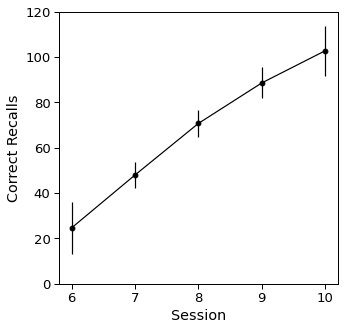

In [16]:
def std_ddof(a):
    std = np.std(a, ddof=1)
    return std
with sns.plotting_context(context='paper', font_scale=1.5, 
#                           rc={'axes.labelsize': 100}
                       ):
    fig = plt.figure(figsize=(5, 5))
    #bax = brokenaxes(ylims=((0, 2), (150, 260)), hspace=.08)
    x = np.arange(6,11,1)
    y = correct_masson_VFFR.groupby('session').agg(mean_correct=('adj_correct_recs', 'mean'))['mean_correct'].to_numpy()
    std = correct_masson_VFFR.groupby('session').agg(std=('adj_correct_recs', std_ddof))['std'].to_numpy()
    count = correct_masson_VFFR.groupby('session').agg(count=('adj_correct_recs', 'count'))['count'].to_numpy()
    yerr = 1.96 * (std / (count ** 0.5))
    #sns.relplot(x='session', y='adj_correct_recs', data=correct_masson_repFR, color='k', kind='line')
    plt.errorbar(x, y, yerr = yerr, color='k', marker='o' )
    plt.xlabel('Session')
    plt.ylabel('Correct Recalls')
    plt.xticks(np.arange(6,11,1, dtype=int))
    plt.ylim(0,120)
    #dir(bax.axs)
    plt.savefig('figures/exp1_correct_recs.pdf')

In [17]:
# number of intrusions in each session
exp1_intr=exp1_data.drop_duplicates(subset=['subject', 'session', 'item_name']).query("type == 'FFR_REC_WORD' and intrusion == 1").groupby(['subject','session']).agg(intr=
                                                                                                             ('item_name','count')).reset_index()

In [18]:
exp1_intr = exp1_intr.merge(missing_sessions, how='left', indicator=True).query('_merge == "left_only"').drop(columns='_merge')

In [19]:
exp1_intr.to_csv('dataframes/exp1_intr.csv', index=False)

In [20]:
intr_masson_VFFR=loftus_masson(exp1_intr, 'subject', 'session', 'intr')

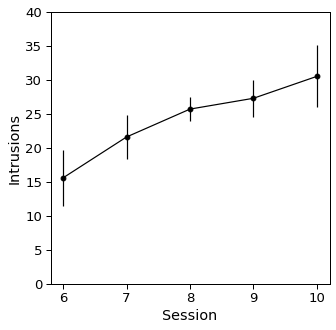

In [21]:
def std_ddof(a):
    std = np.std(a, ddof=1)
    return std
with sns.plotting_context(context='paper', font_scale=1.5, 
#                           rc={'axes.labelsize': 100}
                       ):
    fig = plt.figure(figsize=(5, 5))
    #bax = brokenaxes(ylims=((0, 2), (150, 260)), hspace=.08)
    x = np.arange(6,11,1)
    y = intr_masson_VFFR.groupby('session').agg(mean_correct=('adj_intr', 'mean'))['mean_correct'].to_numpy()
    std = intr_masson_VFFR.groupby('session').agg(std=('adj_intr', std_ddof))['std'].to_numpy()
    count = intr_masson_VFFR.groupby('session').agg(count=('adj_intr', 'count'))['count'].to_numpy()
    yerr = 1.96 * (std / (count ** 0.5))
    #sns.relplot(x='session', y='adj_correct_recs', data=correct_masson_repFR, color='k', kind='line')
    plt.errorbar(x, y, yerr = yerr, color='k', marker='o' )
    plt.xlabel('Session')
    plt.ylabel('Intrusions')
    plt.xticks(np.arange(6,11,1, dtype=int))
    plt.ylim(0,40)
    #dir(bax.axs)
    plt.savefig('figures/exp1_intrusion_count.pdf')

# Experiment 2

In [22]:
exp2_data = pd.read_csv('dataframes/exp2_ffr_evs.csv')

/usr/global/miniconda/py310_23.1.0-1/envs/workshop/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (7,21,24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [23]:
# final free recall events
ffr_evs_FR = exp2_data.query("type == 'REC_WORD'")
ffr_evs_FR = ffr_evs_FR[ffr_evs_FR['list']==26]

In [24]:
# remove recall repetitions
ffr_evs_no_reps_FR = ffr_evs_FR.drop_duplicates(subset=['subject', 'session', 'item_name'])

In [25]:
ffr_evs_no_reps_FR['subject'] = ffr_evs_no_reps_FR['subject'].astype('category')
ffr_evs_no_reps_FR['session'] = ffr_evs_no_reps_FR['session'].astype('category')

/usr/global/miniconda/py310_23.1.0-1/envs/workshop/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/global/miniconda/py310_23.1.0-1/envs/workshop/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
recs_FR = ffr_evs_no_reps_FR.groupby(['subject','session']).agg(recs=('item_name','count')).reset_index()

In [27]:
#remove sessions with no data
recs_FR = recs_FR.query('~((subject == "LTP441" and session == 1) or (subject == "LTP445" and session == 8))')

In [29]:
recs_FR.to_csv('dataframes/exp2_recs.csv', index=False)

In [30]:
correct_recs_FR=ffr_evs_no_reps_FR.query('intrusion!=-1').groupby(['subject','session']).agg(correct_recs=('item_name','count')).reset_index()

In [31]:
#remove sessions with no data
correct_recs_FR = correct_recs_FR.query('~((subject == "LTP441" and session == 1) or (subject == "LTP445" and session == 8))')

In [32]:
correct_recs_FR.to_csv('dataframes/exp2_correct_recs.csv', index=False)

In [33]:
correct_masson_repFR=loftus_masson(correct_recs_FR, 'subject', 'session', 'correct_recs')

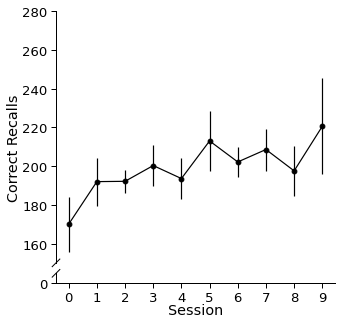

In [34]:
def std_ddof(a):
    std = np.std(a, ddof=1)
    return std

with sns.plotting_context(context='paper', font_scale=1.5, 
#                           rc={'axes.labelsize': 100}
                         ):
    fig = plt.figure(figsize=(5, 5))
    bax = brokenaxes(ylims=((0, 5), (150, 280)), hspace=.08)
    x = np.arange(0,10,1)
    y = correct_masson_repFR.groupby('session').agg(mean_correct=('adj_correct_recs', 'mean'))['mean_correct'].to_numpy()
    std = correct_masson_repFR.groupby('session').agg(std=('adj_correct_recs', std_ddof))['std'].to_numpy()
    count = correct_masson_repFR.groupby('session').agg(count=('adj_correct_recs', 'count'))['count'].to_numpy()
    yerr = 1.96 * (std / (count ** 0.5))
    #sns.relplot(x='session', y='adj_correct_recs', data=correct_masson_repFR, color='k', kind='line')
    bax.errorbar(x, y, yerr = yerr, color='k', marker='o' )
    bax.set_xticks(np.arange(1,10,1,dtype=int))
    bax.set_xlabel('Session')
    bax.set_ylabel('Correct Recalls')
    #dir(bax.axs)
    plt.savefig('figures/exp2_correct_recs.pdf')

In [35]:
exp2_intrusions=ffr_evs_no_reps_FR.query("intrusion==-1").groupby(['subject','session']).agg(intrusions=('item_name','count')).reset_index()

In [36]:
#remove sessions with no data
exp2_intrusions = exp2_intrusions.query('~((subject == "LTP441" and session == 1) or (subject == "LTP445" and session == 8))')

In [37]:
exp2_intrusions.to_csv('dataframes/exp2_intr.csv', index=False)

In [38]:
massongraph_FR=loftus_masson(exp2_intrusions, 'subject', 'session', 'intrusions')

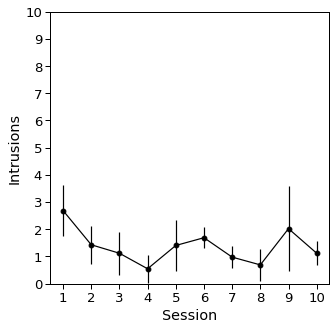

In [39]:
def std_ddof(a):
    std = np.std(a, ddof=1)
    return std
with sns.plotting_context(context='paper', font_scale=1.5, 
#                           rc={'axes.labelsize': 100}
                       ):
    fig = plt.figure(figsize=(5, 5))
    #bax = brokenaxes(ylims=((0, 2), (150, 260)), hspace=.08)
    x = np.arange(1,11,1)
    y = massongraph_FR.groupby('session').agg(mean_correct=('adj_intrusions', 'mean'))['mean_correct'].to_numpy()
    std = massongraph_FR.groupby('session').agg(std=('adj_intrusions', std_ddof))['std'].to_numpy()
    count = massongraph_FR.groupby('session').agg(count=('adj_intrusions', 'count'))['count'].to_numpy()
    yerr = 1.96 * (std / (count ** 0.5))
    #sns.relplot(x='session', y='adj_correct_recs', data=correct_masson_repFR, color='k', kind='line')
    plt.errorbar(x, y, yerr = yerr, color='k', marker='o' )
    plt.xlabel('Session')
    plt.ylabel('Intrusions')
    plt.xticks(np.arange(1,11,1, dtype=int))
    plt.ylim(0,10)
    plt.yticks(np.arange(0,11,1, dtype=int))
    #plt.ylim(0,4)
    #dir(bax.axs)
    plt.savefig('figures/exp2_intrusion_count.pdf')